# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
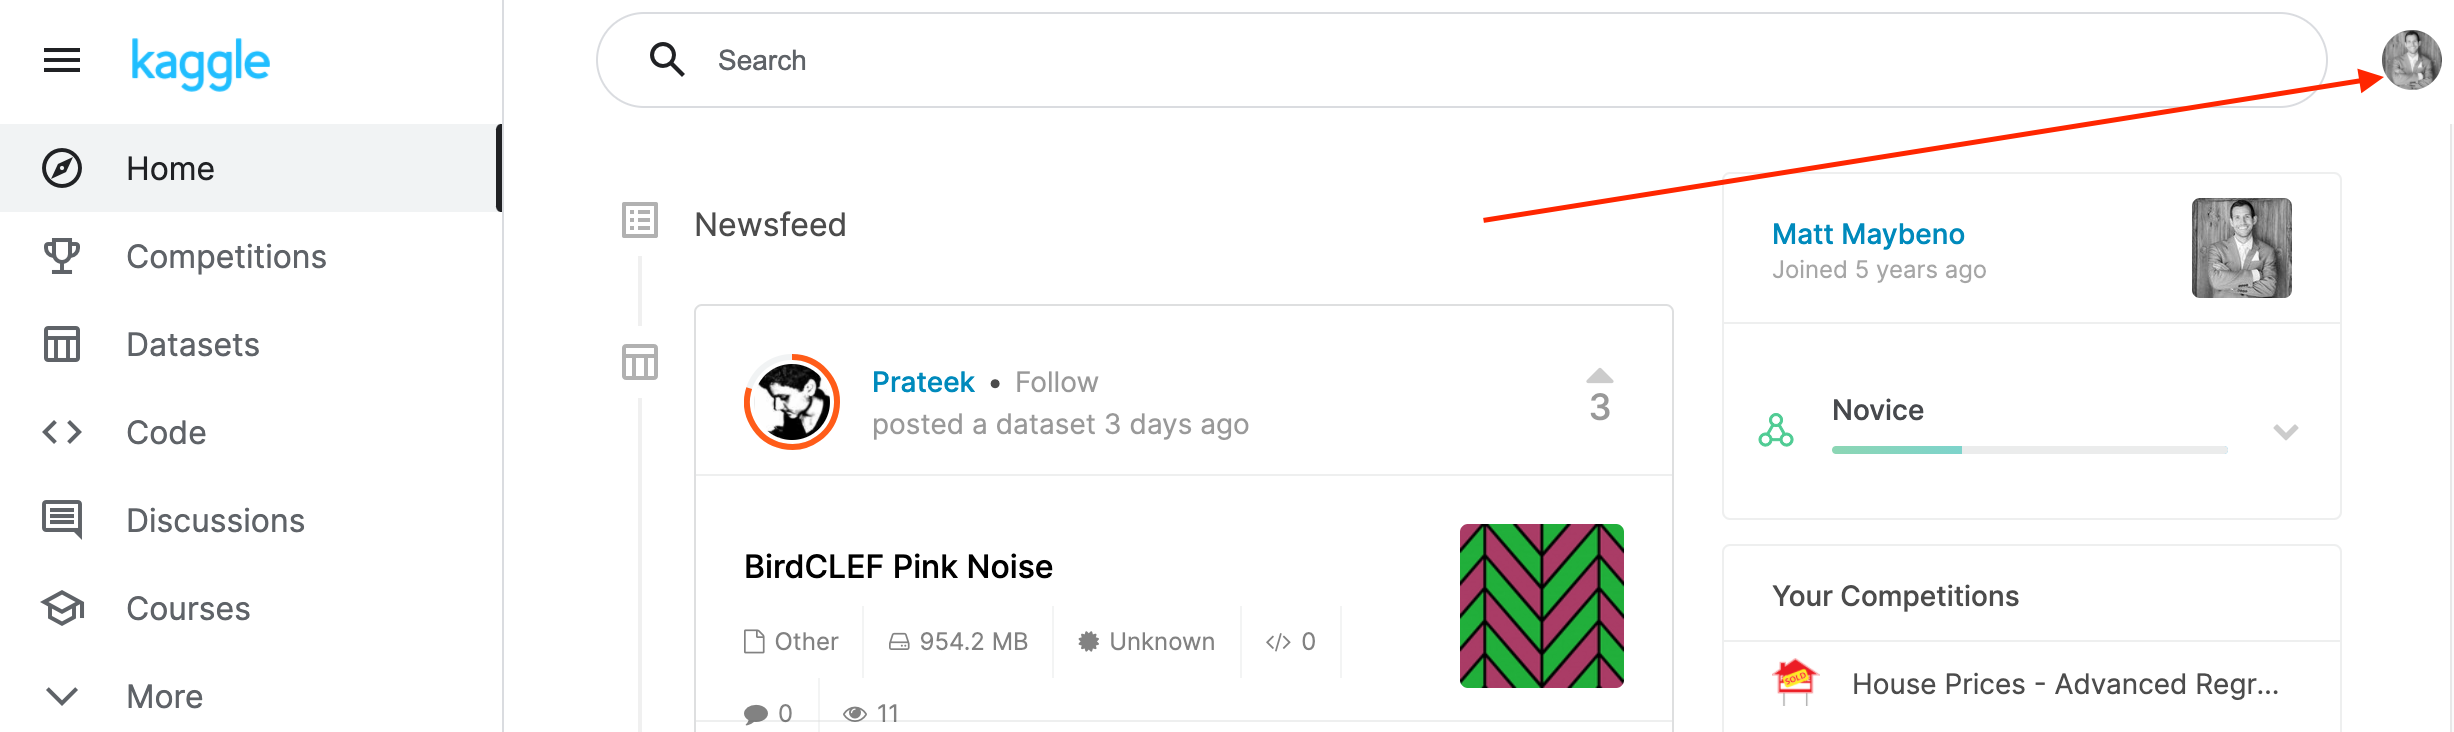
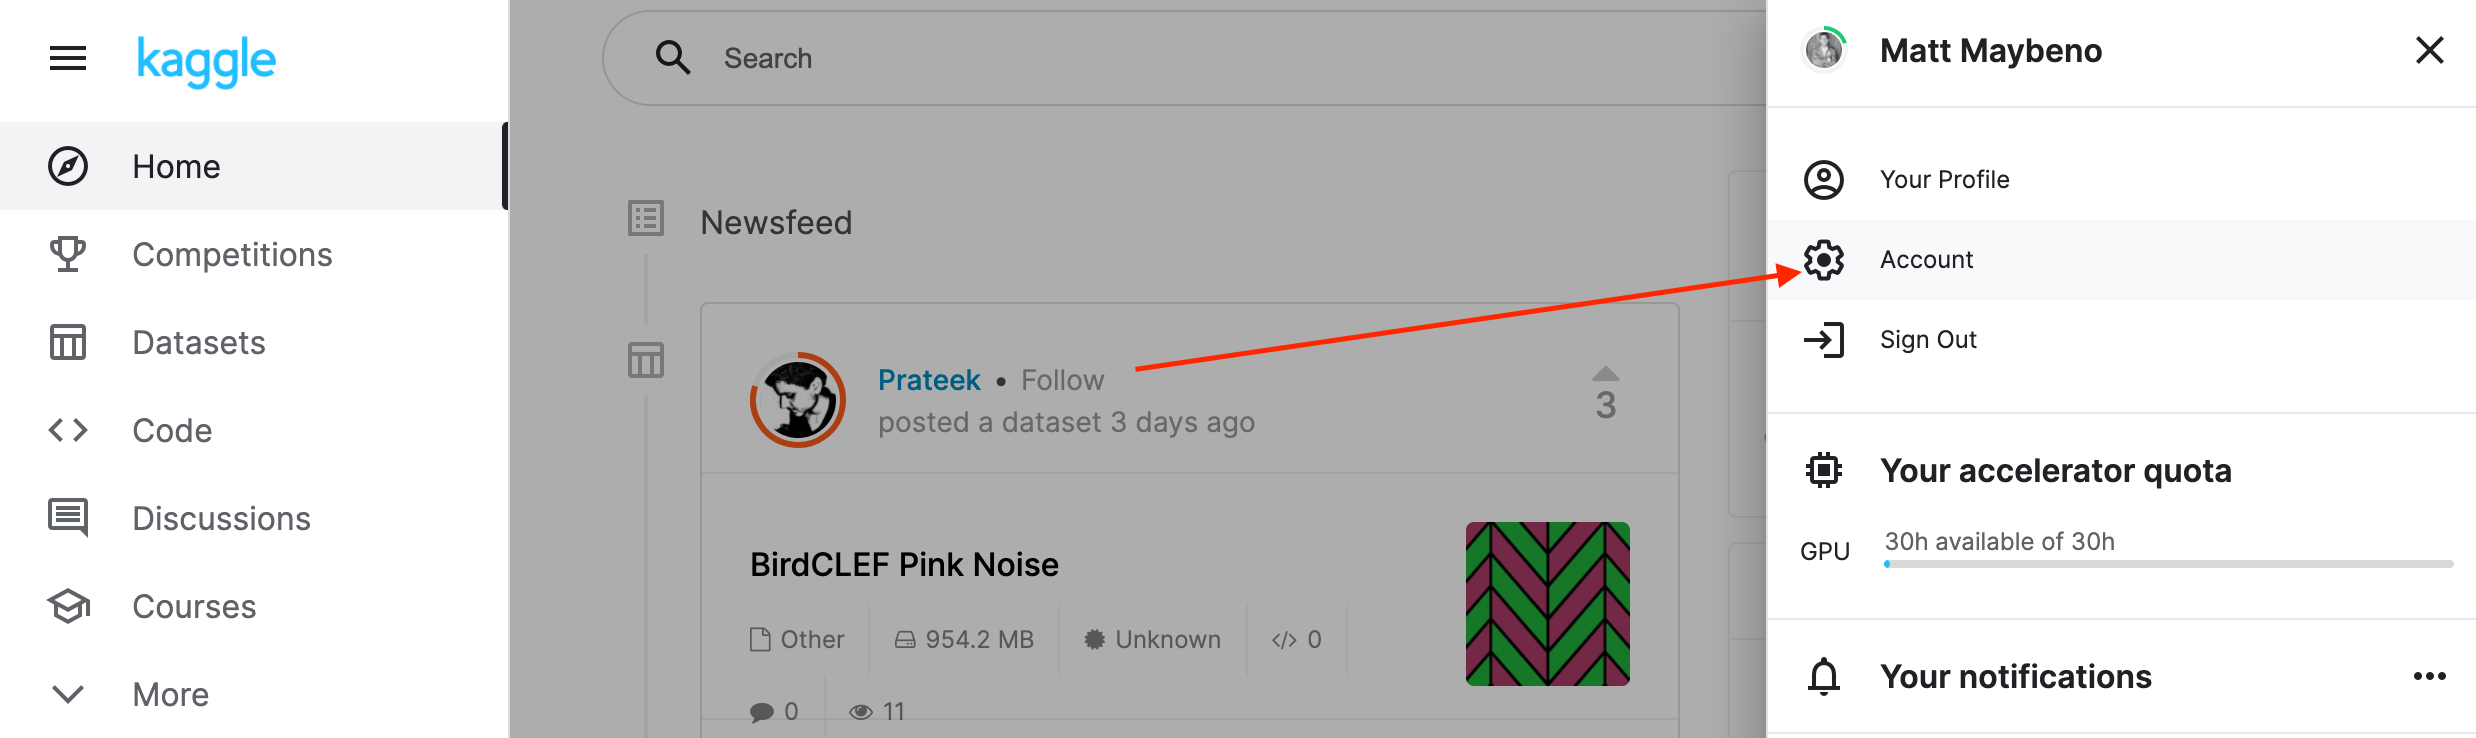
2. Scroll down to API and click Create New API Token.
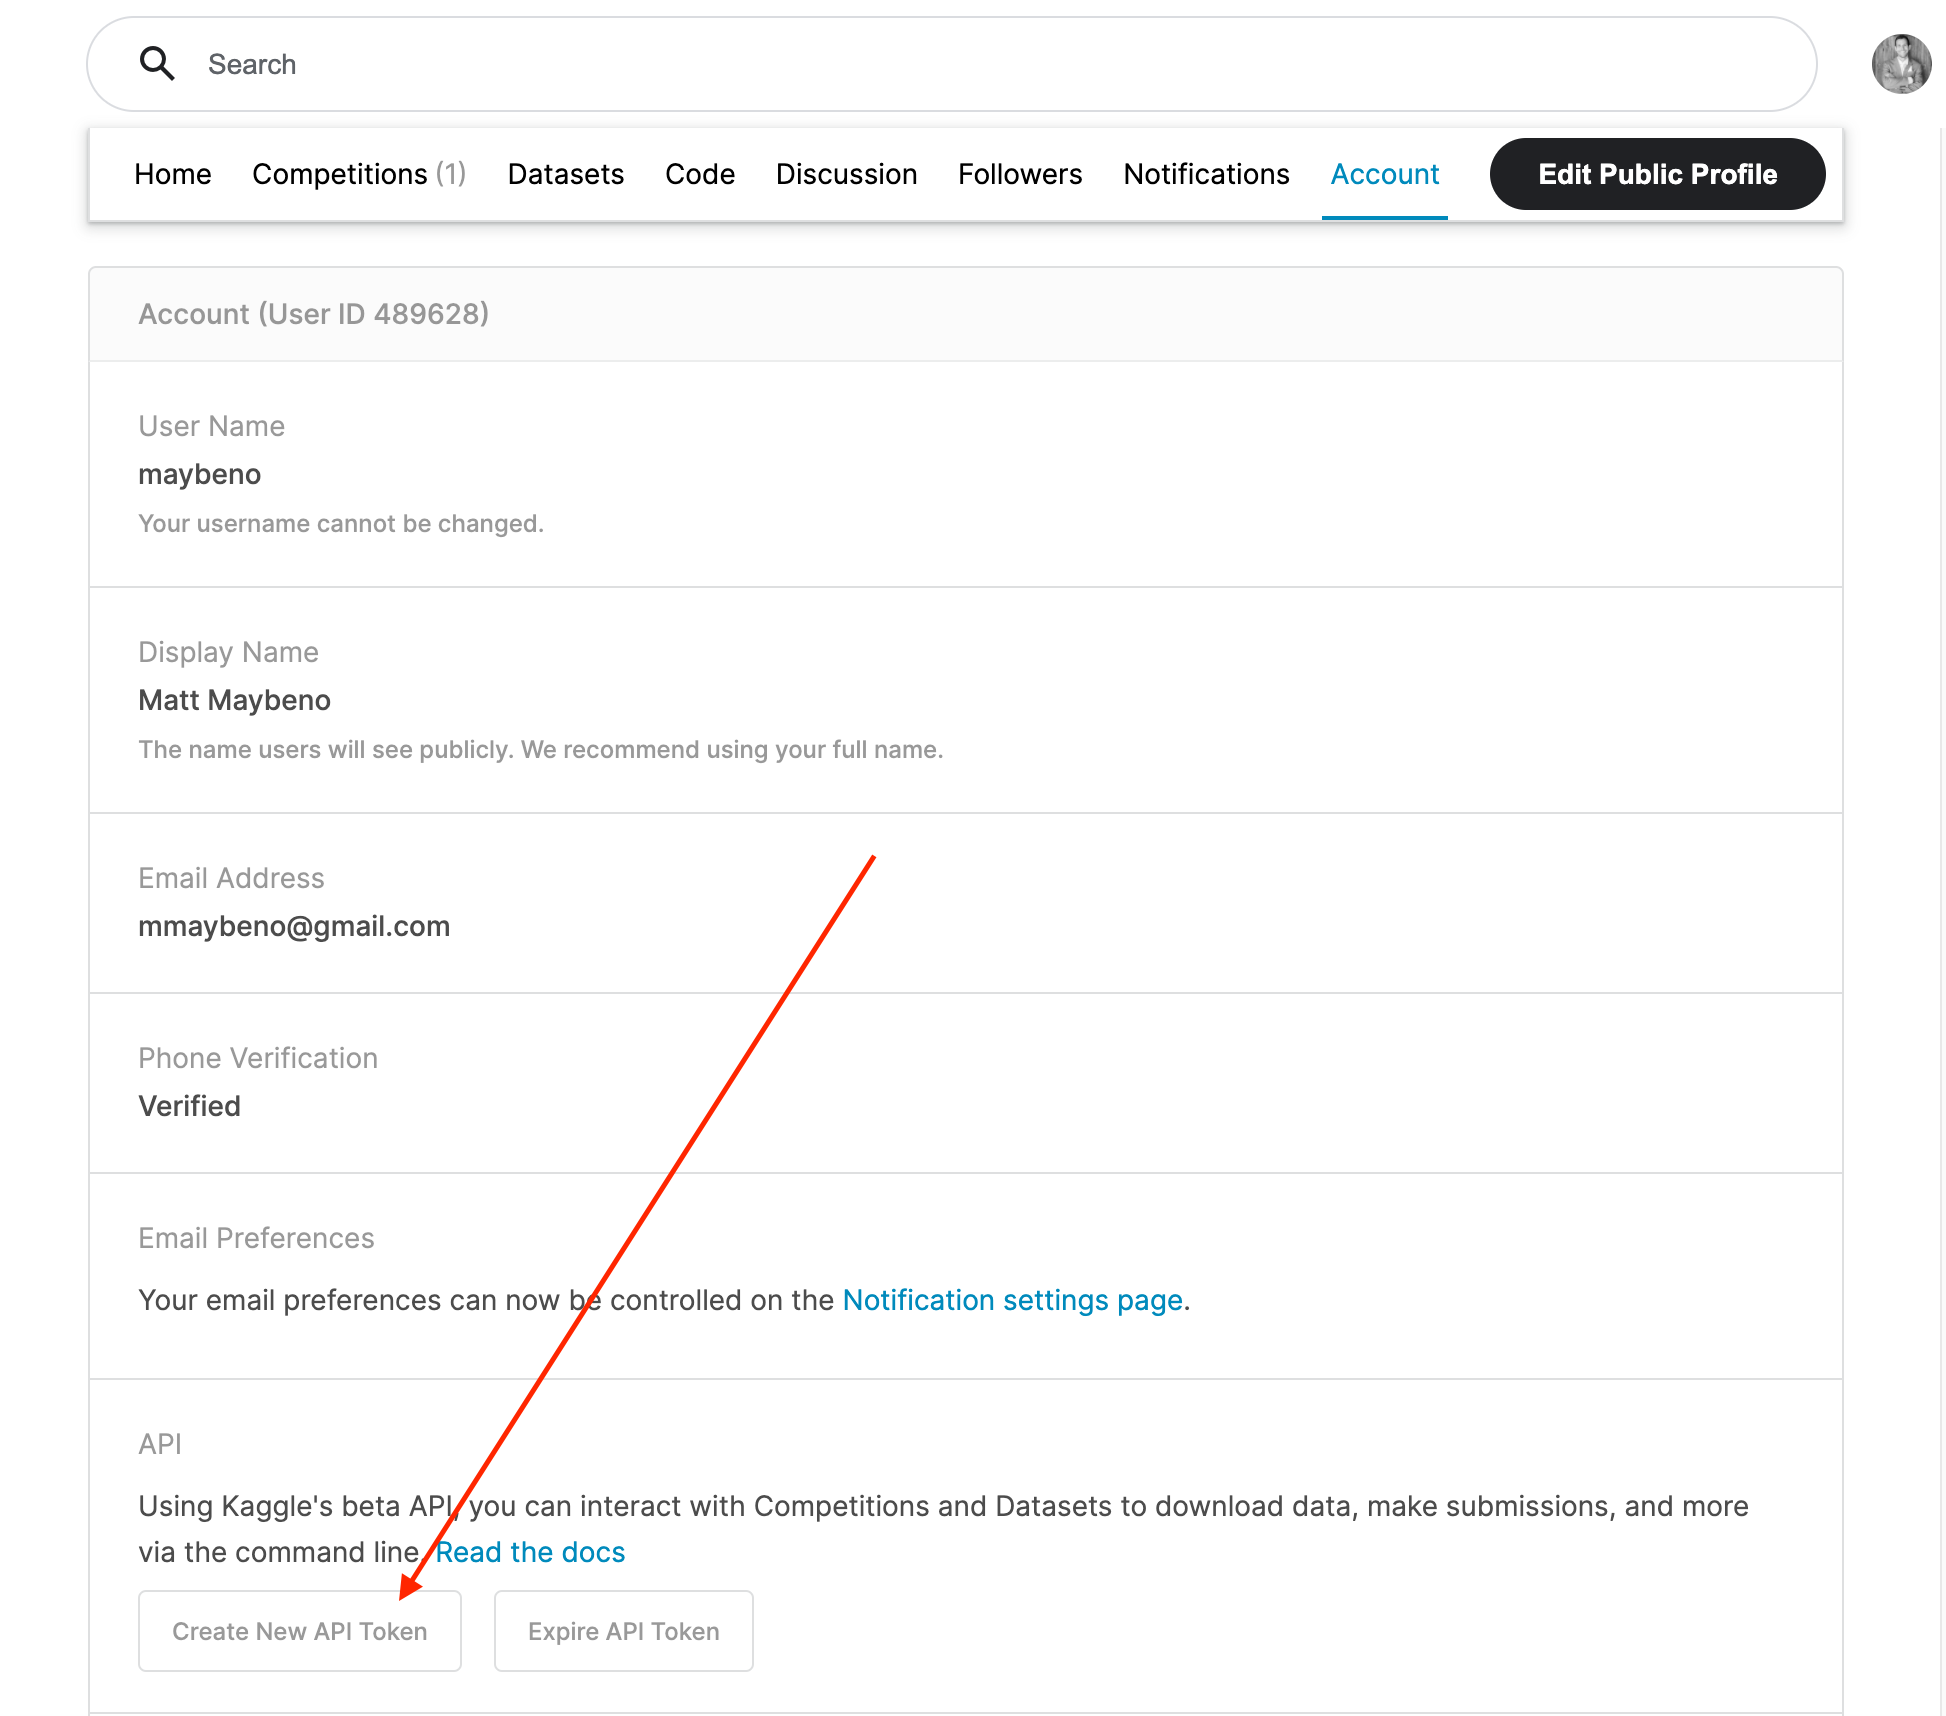
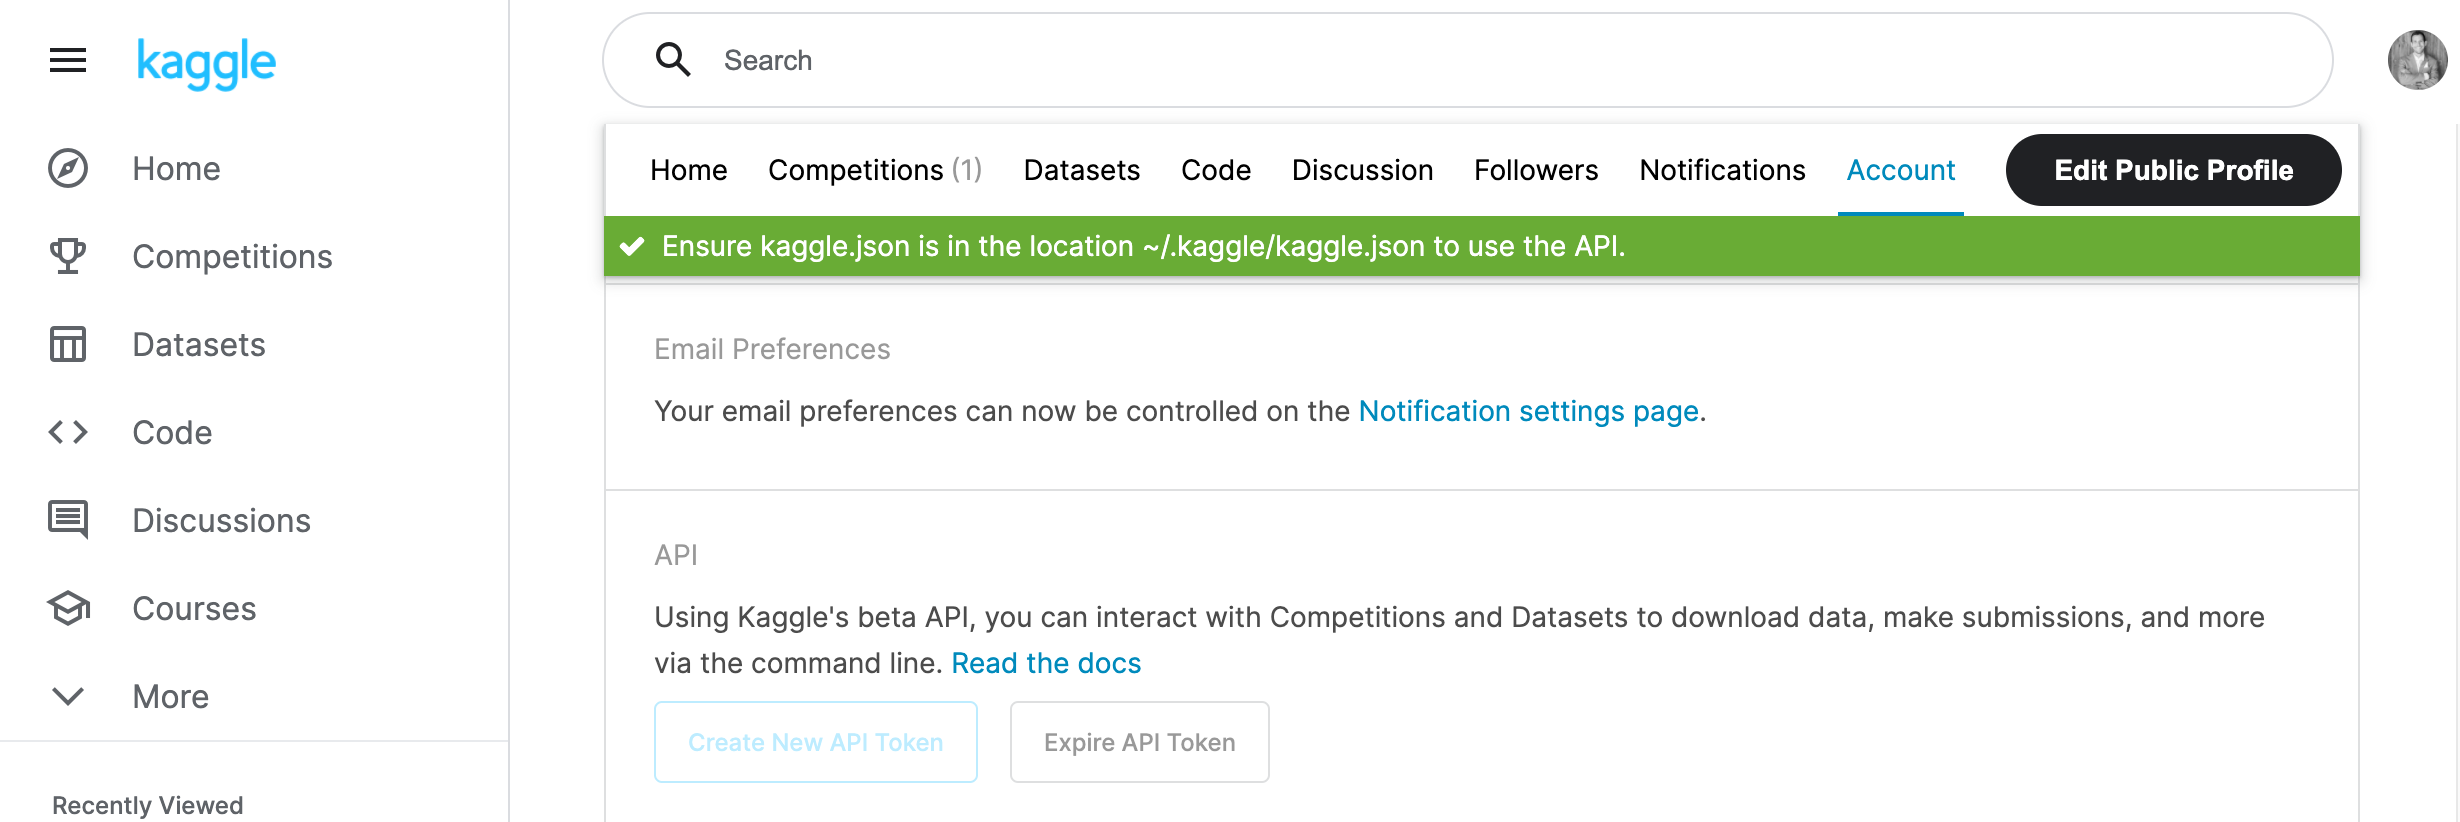
3. Open up `kaggle.json` and use the username and key.
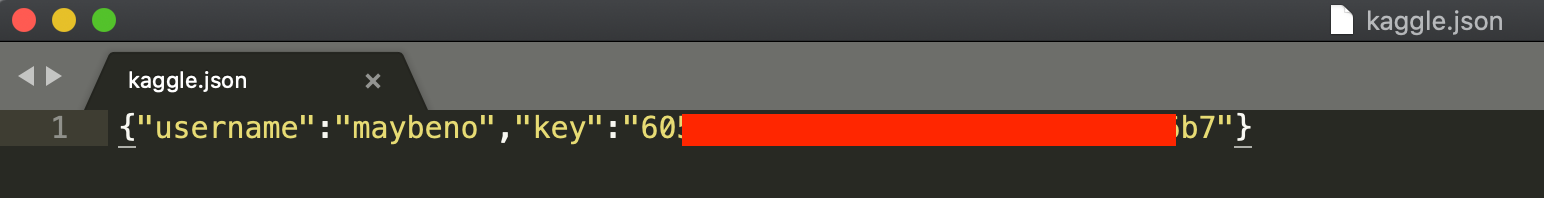

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-66.1.1-py3-none-any.whl (1.3 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.6/103.6 kB 230.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [33]:
cd /root

/root


In [34]:
ls

AutogluonModels/             submission.csv
bike-sharing-demand.zip      submission_new_features.csv
cd0385-project-starter/      submission_new_features_2.csv
histogram_hours_feature.png  submission_new_hpo.csv
model_test_score.png         test.csv
model_train_score.png        train.csv
sampleSubmission.csv


### Setup Kaggle API Key

In [35]:
!pip install -U kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)


In [36]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "pghugare"
kaggle_key = "6add27806572c978578c6e3757086862"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
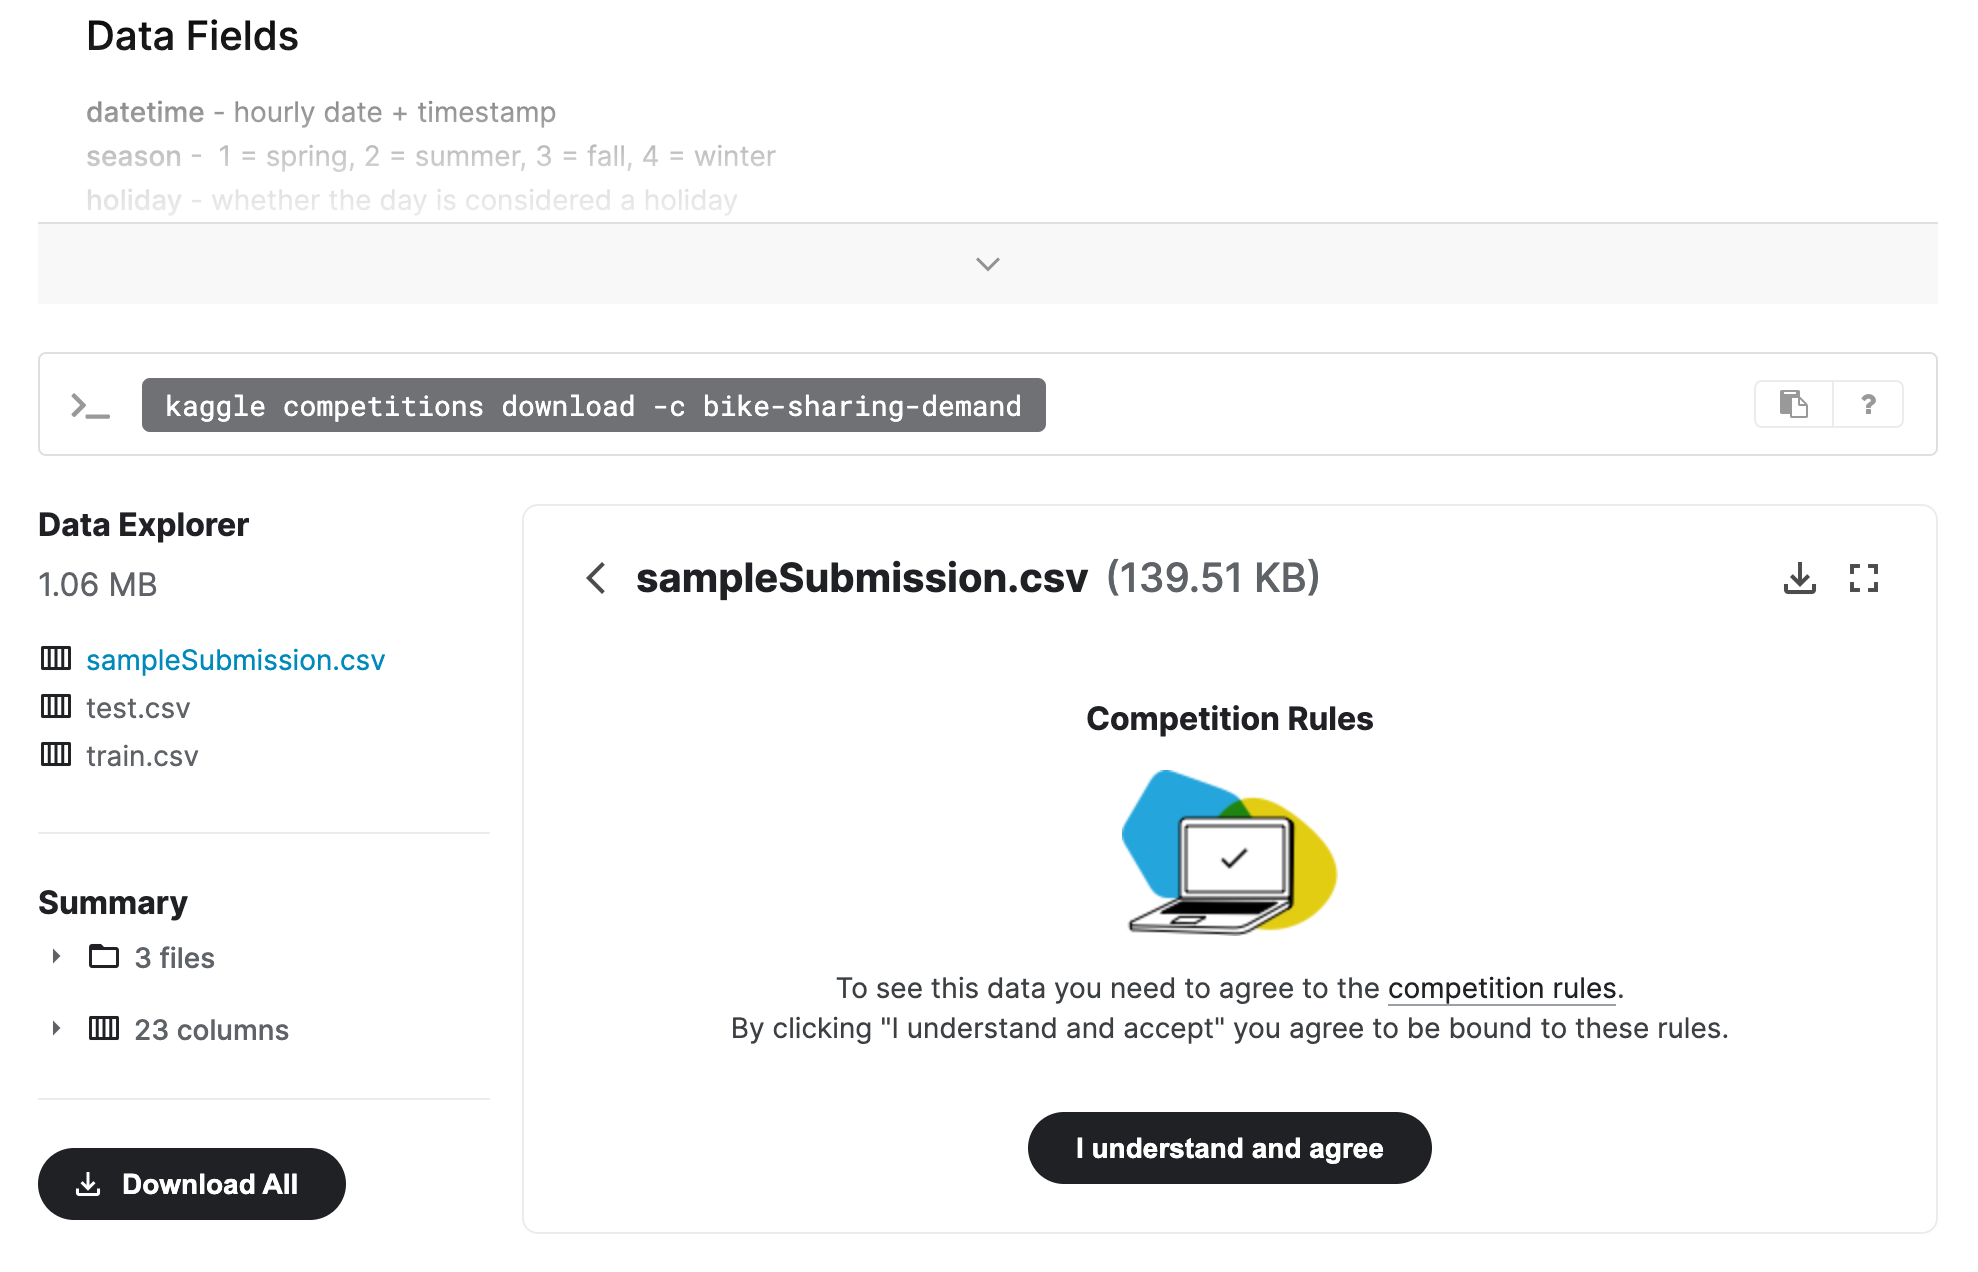

In [18]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 6.16MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:

columns_to_ignore = ["casual", "registered"]
for column_name in columns_to_ignore:
    train.drop(column_name, axis='columns', inplace=True)
train.head()

## performance metric (RMSE by default)

predictor = TabularPredictor(label="count").fit(train_data = train, time_limit=600, presets=['best_quality'])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.885174      11.174019  505.817829                0.000712           0.311318            3       True         15
1   RandomForestMSE_BAG_L2  -53.393270      10.297766  406.352121                0.606169          27.262657            2       True         12
2     ExtraTreesMSE_BAG_L2  -54.021078      10.297608  387.015604                0.606012           7.926141            2       True         14
3          LightGBM_BAG_L2  -55.101032       9.907717  400.566041                0.216120          21.476578            2       True         11
4          CatBoost_BAG_L2  -55.705478       9.745007  448.841135                0.053410          69.751672            2       True         13
5        LightGBMXT_BAG_L2  -60.705655      13.691409  432.604342         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [17]:
predictions = predictor.predict(test)
predictions.head()

0    23.318344
1    42.508015
2    45.909454
3    48.781364
4    51.674591
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [18]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.555389
std        90.140991
min         3.055882
25%        20.927584
50%        62.675346
75%       168.302856
max       364.284882
Name: count, dtype: float64

In [19]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [20]:
# Set them to zero
predictions[predictions < 0] = 0

In [21]:
predictions.describe()

count    6493.000000
mean      100.555389
std        90.140991
min         3.055882
25%        20.927584
50%        62.675346
75%       168.302856
max       364.284882
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 357kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [25]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-01-23 04:09:07  first raw submission  complete  1.80760      1.80760       


#### Initial score of `1.80760`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

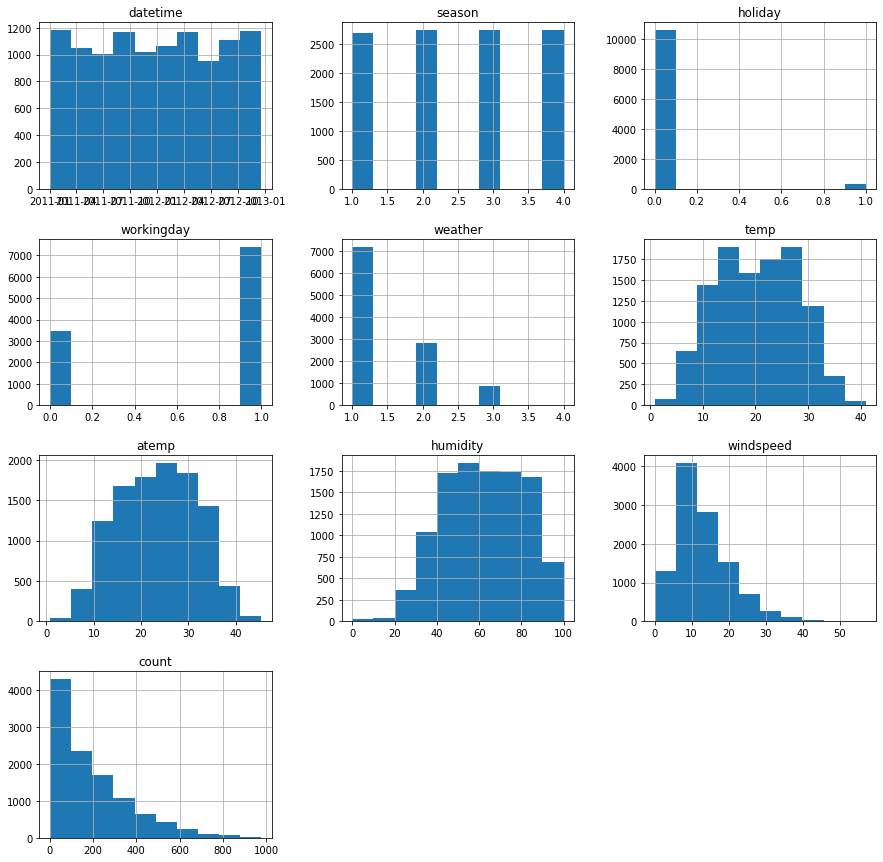

In [26]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

In [16]:
# create a new feature from datetime object

train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['weekday'] = train.datetime.dt.weekday


test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['weekday'] = test.datetime.dt.weekday

train = train.drop('datetime', axis = 1)
test = test.drop('datetime', axis = 1)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   hour        10886 non-null  int64  
 10  year        10886 non-null  int64  
 11  month       10886 non-null  int64  
 12  day         10886 non-null  int64  
 13  weekday     10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ---

In [17]:

train.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,day,weekday
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.006546,-0.004797,0.971524,0.001729,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.000354,0.012021,0.001731,-0.015877,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,0.002780,-0.002482,-0.003394,0.009829,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.022740,-0.012548,0.012144,-0.007890,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.145430,0.061226,0.257589,0.015551,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.140343,0.058540,0.264173,0.011866,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.278011,-0.078606,0.204537,-0.011335,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,0.146631,-0.015221,-0.150192,0.036157,-0.024804
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.400601,0.260403,0.166862,0.019826,-0.002283
hour,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.400601,1.000000,-0.004234,-0.006818,0.001132,-0.002925


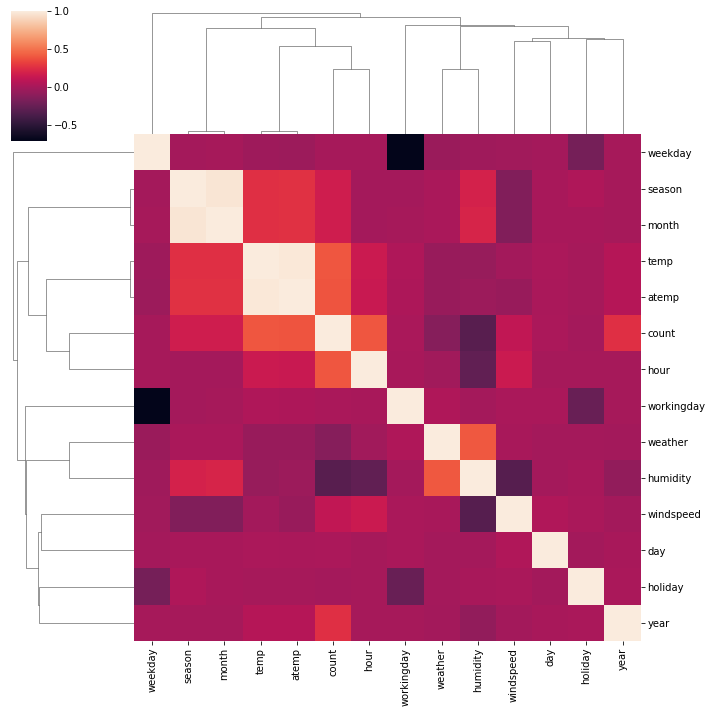

In [18]:
import seaborn as sns
sns.clustermap(train.corr())

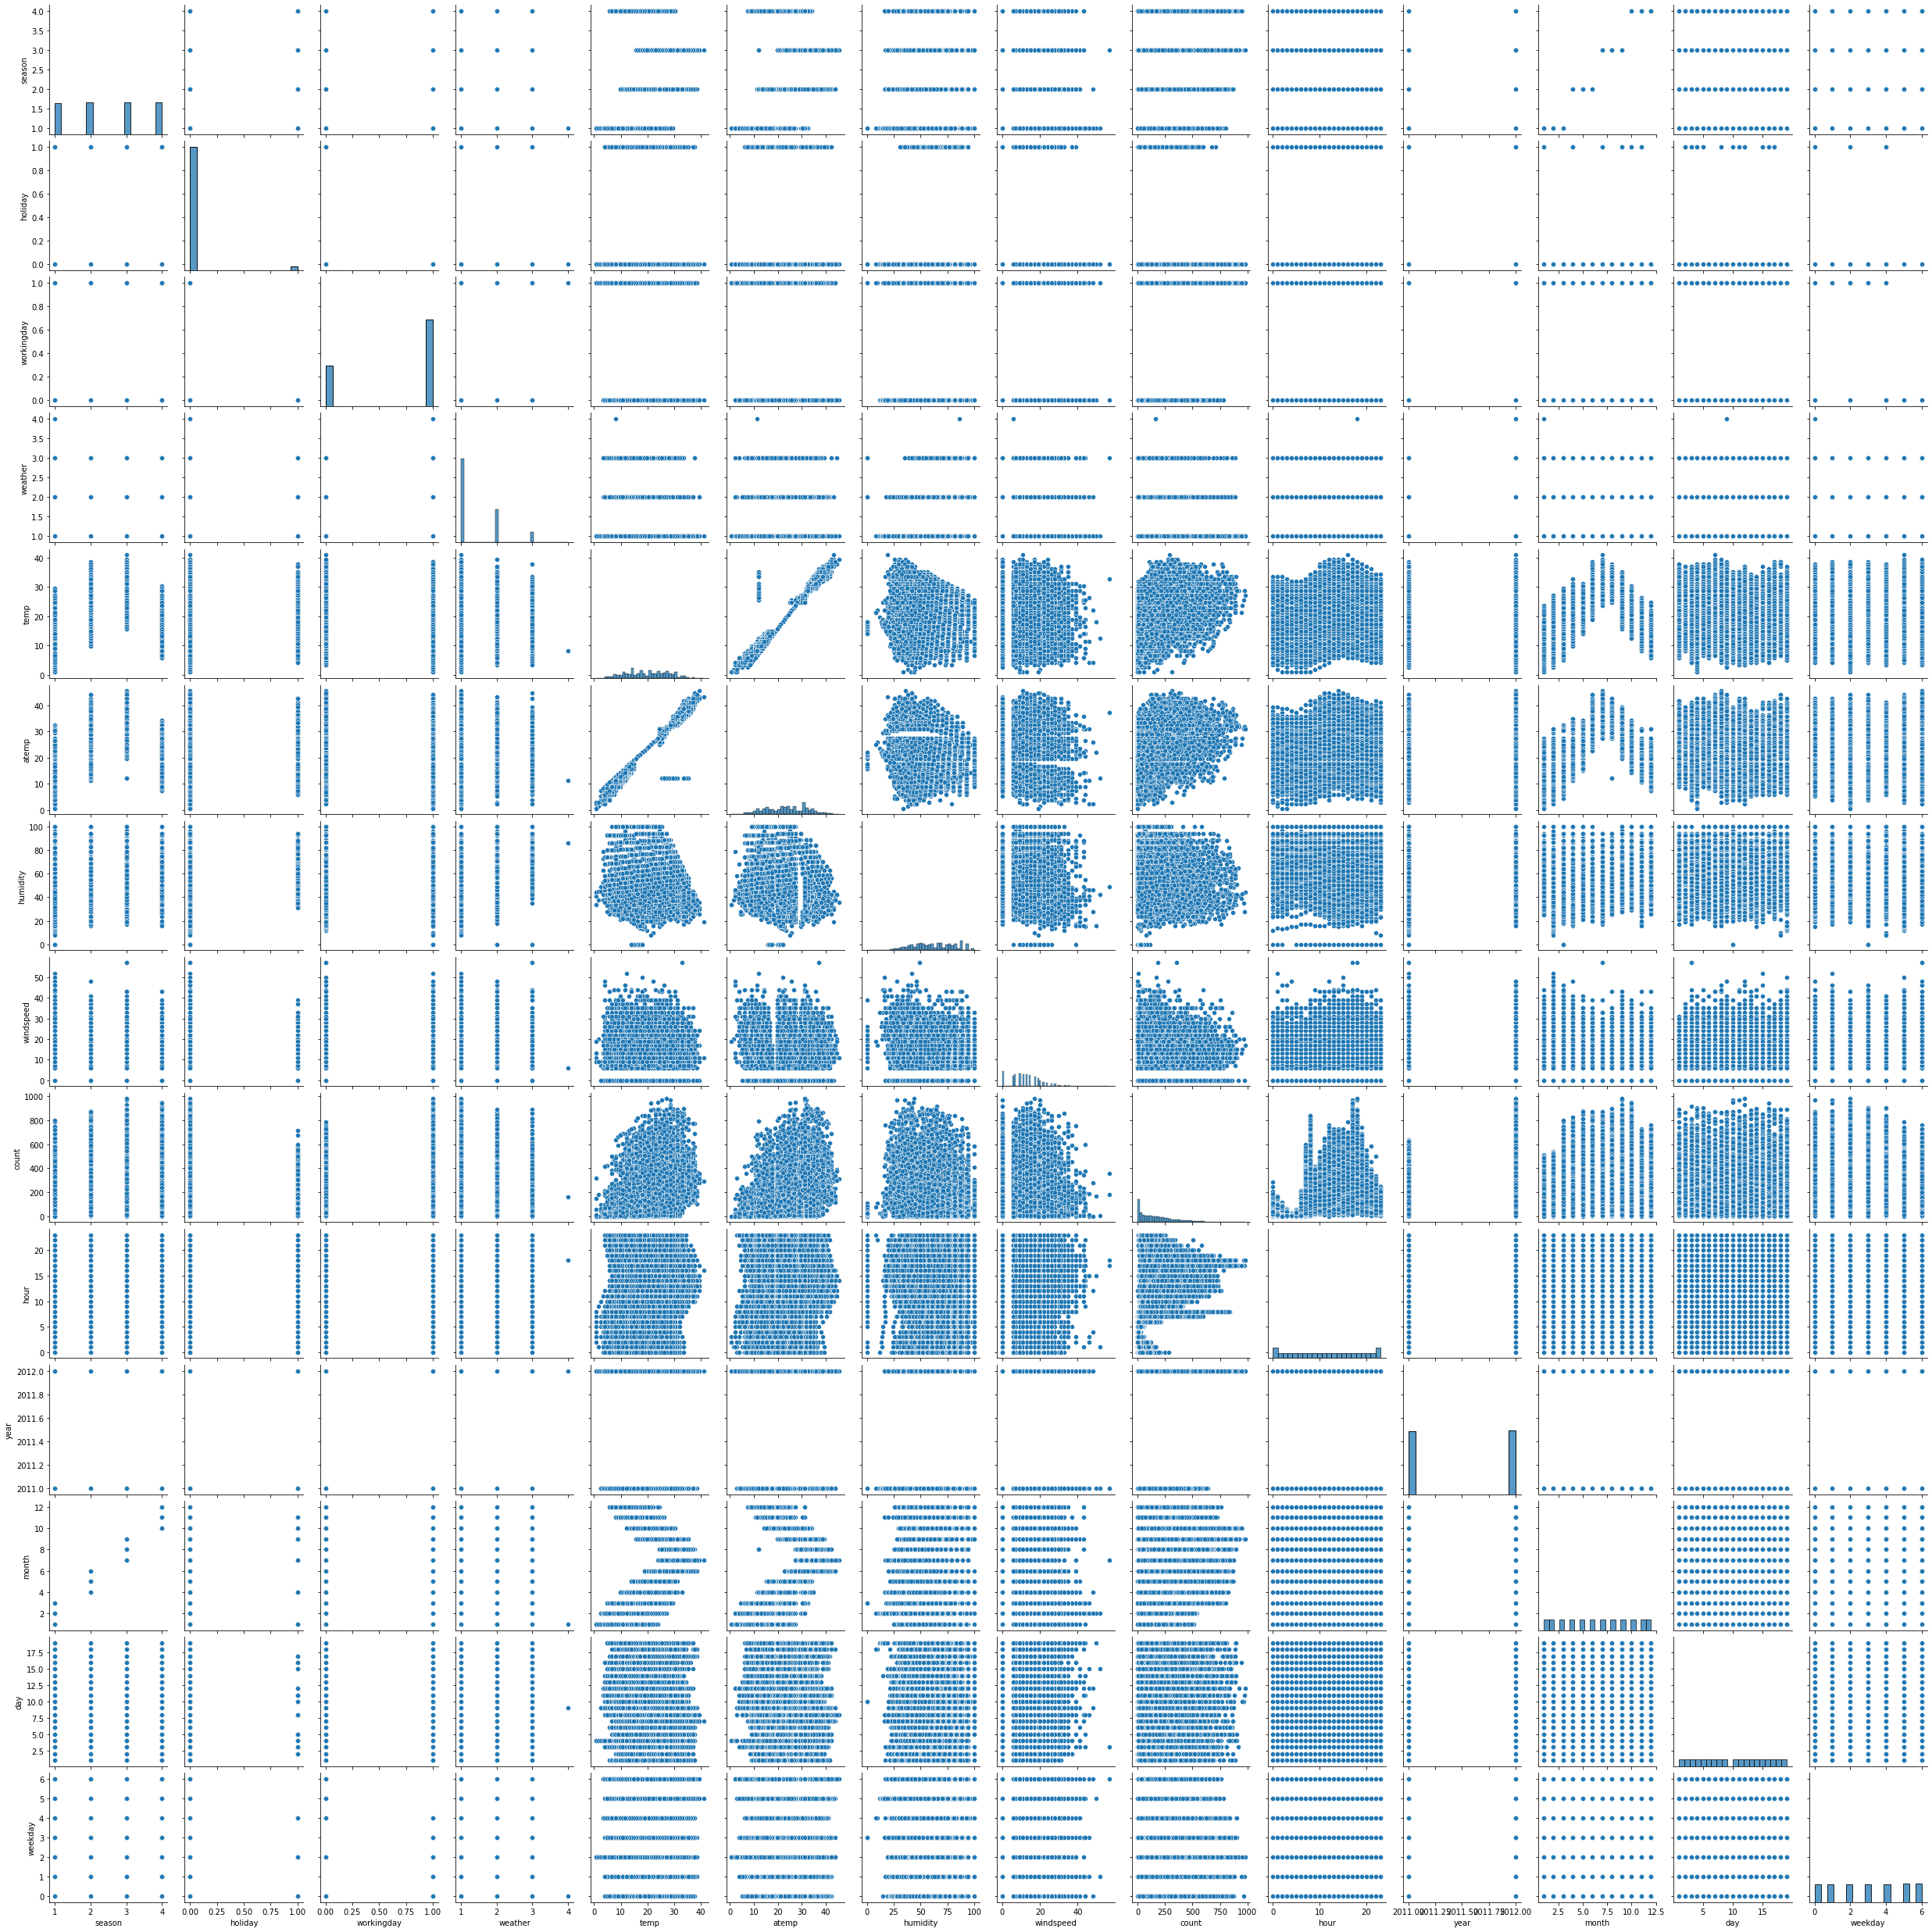

In [19]:
sns.pairplot(train)

<AxesSubplot:xlabel='weekday', ylabel='count'>

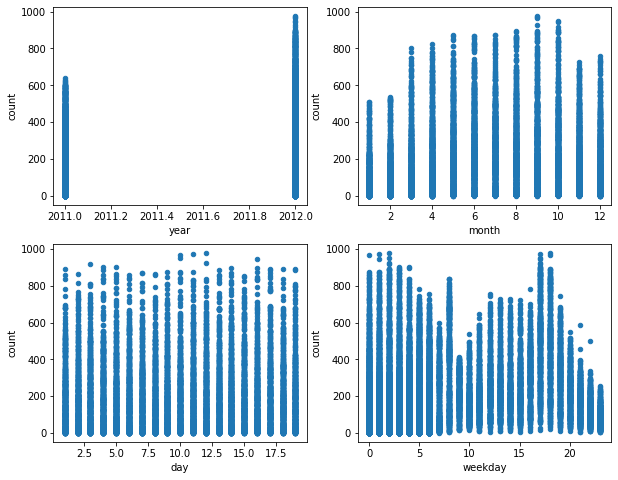

In [20]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
train.plot(ax=axes[0, 0], x="year", y="count", kind="scatter")
train.plot(ax=axes[0, 1], x="month", y="count", kind="scatter")
train.plot(ax=axes[1, 0], x="day", y="count", kind="scatter")
train.plot(ax=axes[1, 1], x="hour", y="count", kind="scatter")
train.plot(ax=axes[1, 1], x="weekday", y="count", kind="scatter")

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [21]:
train["season"] = train.season.astype('category')
train["weather"] = train.weather.astype('category')
train["holiday"] = train.holiday.astype('category')
train["workingday"] = train.workingday.astype('category')

test["season"] = test.season.astype('category')
test["weather"] = test.weather.astype('category')
test["holiday"] = test.holiday.astype('category')
test["workingday"] = test.workingday.astype('category')

In [22]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,day,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,0,2011,1,1,5
1,1,0,0,1,9.02,13.635,80,0.0,40,1,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2,2011,1,1,5
3,1,0,0,1,9.84,14.395,75,0.0,13,3,2011,1,1,5
4,1,0,0,1,9.84,14.395,75,0.0,1,4,2011,1,1,5


array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'weekday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

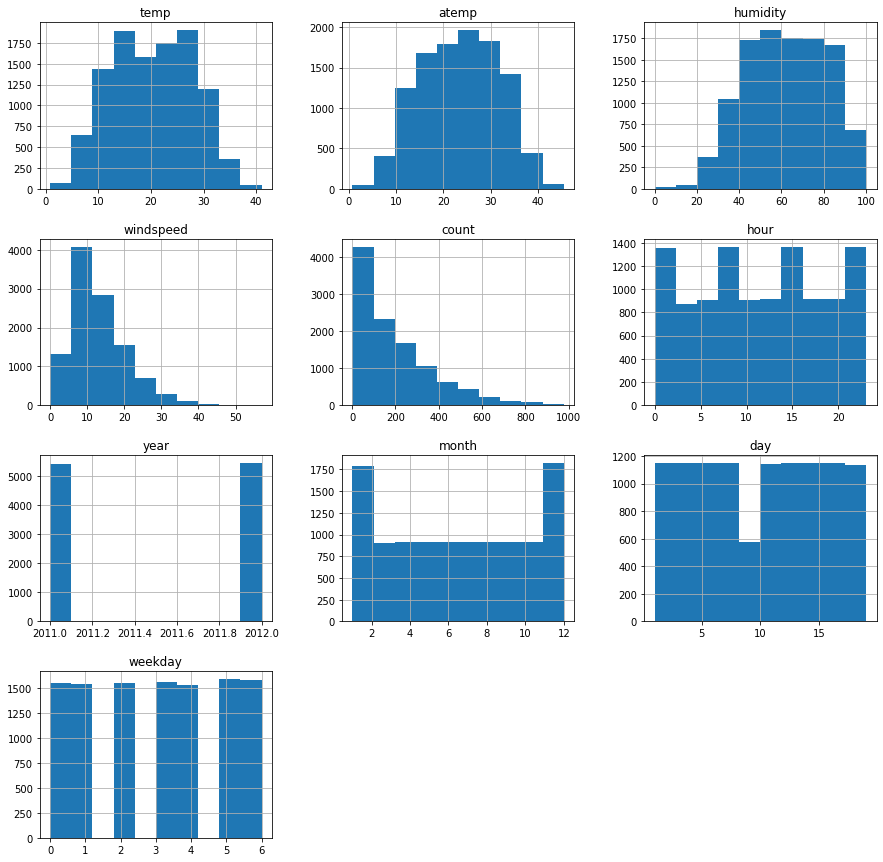

In [23]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,15))

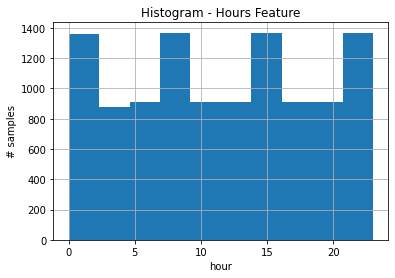

In [31]:
## Histogram - Hours Feature 
ax = train['hour'].hist()
ax.set_xlabel('hour')
ax.set_ylabel('# samples')
ax.set_title('Histogram - Hours Feature')
fig = ax.get_figure()
fig.savefig('histogram_hours_feature.png')

## Step 5: Rerun the model with the same settings as before, just with more features

In [24]:
# verify columns and create train with new features
train_new_features = train[train.columns.to_list()]
train_new_features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,day,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,0,2011,1,1,5
1,1,0,0,1,9.02,13.635,80,0.0,40,1,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2,2011,1,1,5
3,1,0,0,1,9.84,14.395,75,0.0,13,3,2011,1,1,5
4,1,0,0,1,9.84,14.395,75,0.0,1,4,2011,1,1,5


In [25]:
predictor_new_features = TabularPredictor(label="count").fit(train_data = train_new_features, time_limit=600, presets=['best_quality'])

No path specified. Models will be saved in: "AutogluonModels/ag-20230124_040306/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230124_040306/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Dec 9 09:57:03 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [26]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.388291      21.638019  547.511710                0.000679           0.350135            3       True         16
1     ExtraTreesMSE_BAG_L2  -32.555143      20.238662  397.744583                0.601037           7.967542            2       True         14
2      WeightedEnsemble_L2  -32.753155      18.897724  347.555751                0.001064           0.611749            2       True          9
3          CatBoost_BAG_L2  -32.866351      19.748722  448.583476                0.111097          58.806435            2       True         13
4          LightGBM_BAG_L2  -32.883595      19.767843  409.027248                0.130219          19.250206            2       True         11
5   RandomForestMSE_BAG_L2  -33.177270      20.250873  416.766898         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -119.97880966975461,
  'KNeighborsDist_BAG_L1': -115.038459148802,

<AxesSubplot:xlabel='model'>

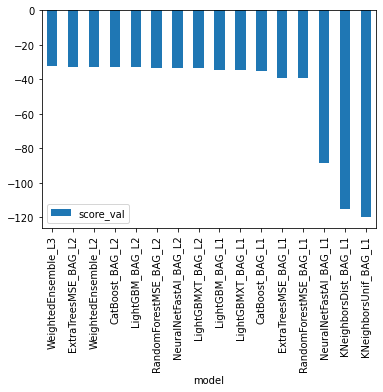

In [27]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [29]:
# Remember to set all negative values to zero

predictions_new_features = predictor_new_features.predict(test)
print((predictions_new_features < 0).sum())
predictions_new_features[predictions_new_features<0] = 0
predictions_new_features.describe()


0


count    6493.000000
mean      189.825287
std       173.529587
min         2.279106
25%        46.497772
50%       147.084320
75%       277.898193
max       905.759033
Name: count, dtype: float64

In [40]:
test["count"] = 0
performance_new_features_2 = predictor_new_features.evaluate(test)
print("The performance indicators are : \n", performance_new_features_2)


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -257.1799339333484
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -257.1799339333484,
    "mean_squared_error": -66141.51841796147,
    "mean_absolute_error": -189.82528704993257,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -147.08432006835938
}


The performance indicators are : 
 {'root_mean_squared_error': -257.1799339333484, 'mean_squared_error': -66141.51841796147, 'mean_absolute_error': -189.82528704993257, 'r2': 0.0, 'pearsonr': nan, 'median_absolute_error': -147.08432006835938}


In [31]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features_2.csv", index=False)

In [37]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features 2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 310kB/s]
Successfully submitted to Bike Sharing Demand

In [38]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-24 04:22:35  new features 2                     complete  0.69366      0.69366       
submission_new_hpo.csv       2023-01-23 15:19:10  new features with hyperparameters  complete  1.31738      1.31738       
submission_new_features.csv  2023-01-23 05:13:22  new features                       complete  0.69366      0.69366       
submission.csv               2023-01-23 04:09:07  first raw submission               complete  1.80760      1.80760       


#### New Score of `0.69366`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [44]:
train_new_hpo = train[train.columns.to_list()]
train_new_hpo.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,day,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,0,2011,1,1,5
1,1,0,0,1,9.02,13.635,80,0.0,40,1,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2,2011,1,1,5
3,1,0,0,1,9.84,14.395,75,0.0,13,3,2011,1,1,5
4,1,0,0,1,9.84,14.395,75,0.0,1,4,2011,1,1,5


In [55]:
#https://auto.gluon.ai/stable/tutorials/tabular_prediction/tabular-indepth.html#specifying-hyperparameters-and-tuning-them

import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs 
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36)  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  
    # hyperparameters of each model type
    'GBM': gbm_options,
    'NN': nn_options }  

search_strategy = 'auto'

hyperparameter_tune_kwargs = {  
    # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'scheduler' : 'local', # local scheduler
    'searcher': search_strategy
}

predictor_new_hpo = TabularPredictor(label="count").fit(train_data=train_new_hpo, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

In [19]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -132.758746       0.002508  237.809628                0.001135           1.007823            3       True         16
1    LightGBM_BAG_L2/T1 -132.910994       0.001118  196.132830                0.000139          19.016073            2       True         11
2    LightGBM_BAG_L2/T2 -132.971214       0.001108  197.085495                0.000129          19.968738            2       True         12
3   WeightedEnsemble_L2 -133.074144       0.001216   38.909853                0.000999           0.441841            2       True         10
4    LightGBM_BAG_L2/T5 -133.191017       0.001094  197.683682                0.000115          20.566925            2       True         15
5    LightGBM_BAG_L1/T8 -133.366596       0.000085   19.524052                0.000085      

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -135.4732072756916,
  'LightGBM_BAG_L1/T2': -135.02952795945737,
  'LightGBM_BAG_L1/T3': -134.19413006667938,
 

In [20]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
print((predictions_new_hpo < 0).sum())
predictions_new_hpo[predictions_new_hpo<0] = 0
predictions_new_hpo.describe()

0


count    6493.000000
mean      195.552979
std       118.013786
min        44.590271
25%       108.154114
50%       166.215988
75%       265.650452
max       586.378479
Name: count, dtype: float64

In [21]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('submission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 303kB/s]
Successfully submitted to Bike Sharing Demand

In [23]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-23 15:19:10  new features with hyperparameters  complete  1.31738      1.31738       
submission_new_features.csv  2023-01-23 05:13:22  new features                       complete  0.69366      0.69366       
submission.csv               2023-01-23 04:09:07  first raw submission               complete  1.80760      1.80760       


#### New Score of `1.3173`

In [45]:
# second attempt of hypertuning using default 
hyperparameters = 'default'
hyperparameter_tune_kwargs = 'auto'

predictor_new_hpo_2 = TabularPredictor(label="count").fit(train_data=train_new_hpo, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 28.54s of the 71.13s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.5697	 = Validation score   (-root_mean_squared_error)
	32.43s	 = Training   runtime
	0.22s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 35.29s of remaining time.
	-32.4438	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 565.42s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230124_044035/")


In [46]:
predictor_new_hpo_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.443774       2.589879  365.024152                0.000785           0.522403            3       True         18
1      WeightedEnsemble_L2  -32.653702       2.588854  199.551741                0.000812           0.460111            2       True         10
2     ExtraTreesMSE_BAG_L2  -32.681000       2.588577  248.454099                0.000148          11.326929            2       True         15
3       LightGBM_BAG_L2/T1  -32.869428       2.588549  259.950361                0.000120          22.823192            2       True         12
4   RandomForestMSE_BAG_L2  -32.944686       2.588613  269.409279                0.000184          32.282109            2       True         13
5       CatBoost_BAG_L2/T1  -33.020736       2.588523  271.446168         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_perfor

<AxesSubplot:xlabel='model'>

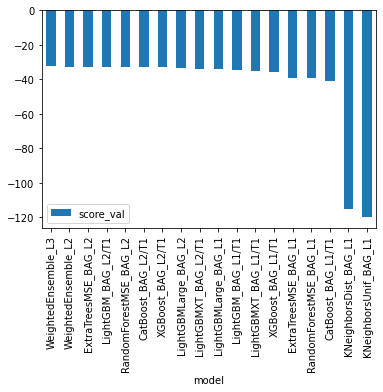

In [47]:
predictor_new_hpo_2.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [48]:
test["count"] = 0
performance_new_hpo_2 = predictor_new_hpo_2.evaluate(test)
print("The performance indicators are : \n", performance_new_hpo_2)

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -257.28843951366616
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -257.28843951366616,
    "mean_squared_error": -66197.34110737746,
    "mean_absolute_error": -189.76286823456155,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -147.41567993164062
}


The performance indicators are : 
 {'root_mean_squared_error': -257.28843951366616, 'mean_squared_error': -66197.34110737746, 'mean_absolute_error': -189.76286823456155, 'r2': 0.0, 'pearsonr': nan, 'median_absolute_error': -147.41567993164062}


In [49]:
# Remember to set all negative values to zero
predictions_new_hpo_2 = predictor_new_hpo_2.predict(test)
print((predictions_new_hpo_2 < 0).sum())
predictions_new_hpo_2[predictions_new_hpo_2<0] = 0
predictions_new_hpo_2.describe()

0


count    6493.000000
mean      189.762863
std       173.758575
min         3.497172
25%        45.154335
50%       147.415680
75%       278.535583
max       904.307739
Name: count, dtype: float64

In [50]:
# Same submitting predictions
submission_new_hpo_2 = pd.read_csv('submission.csv')
submission_new_hpo_2["count"] = predictions_new_hpo_2
submission_new_hpo_2.to_csv("submission_new_hpo_2.csv", index=False)

In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_2.csv -m "new features with hyperparameters 2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 341kB/s]
Successfully submitted to Bike Sharing Demand

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_2.csv     2023-01-24 04:58:04  new features with hyperparameters 2  complete  0.44585      0.44585       
submission_new_features.csv  2023-01-24 04:22:35  new features 2                       complete  0.69366      0.69366       
submission_new_hpo.csv       2023-01-23 15:19:10  new features with hyperparameters    complete  1.31738      1.31738       
submission_new_features.csv  2023-01-23 05:13:22  new features                         complete  0.69366      0.69366       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

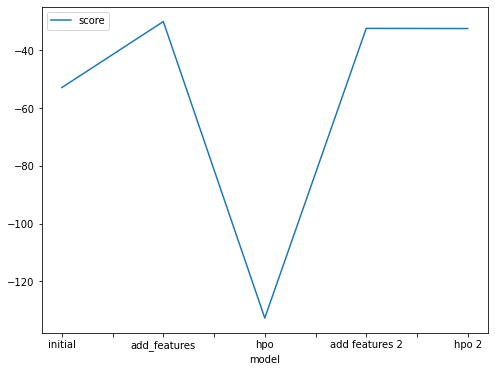

In [73]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "add features 2", "hpo 2"],
        "score": [-52.885174, -30.024358, -132.758746, -32.3882,-32.443774]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score_2.png')

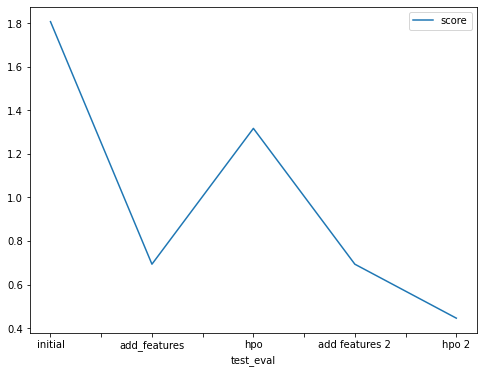

In [53]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo","add features 2", "hpo 2"],
        "score": [1.80760,0.69366,1.31738,0.69366,0.4458]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score_2.png')

### Hyperparameter table

In [72]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo","add features 2", "hpo 2"],
    "time_limit": [600, 600, 600, 600, 600],
    "presets": ["best_quality", "best_quality", "best_quality", "best_quality", "best_quality"],
    "hyperparameters": ['default','default', "{'GBM: "+ str(gbm_options)+"}, {NN: "+ str(nn_options)+"}", 'default','default'],
    "hyperparameter_tune_kwargs":["-", "-", "auto","-", "{'searcher':'auto'}"],
    "score": [1.80760,0.69366,1.31738, 0.69366, 0.4458]
})


,model,time_limit,presets,hyperparameters,hyperparameter_tune_kwargs,score
0,initial,600,best_quality,default,-,1.80760
1,add_features,600,best_quality,default,-,0.69366
2,hpo,600,best_quality,"{'GBM: {'num_boost_round': 100, 'num_leaves': Int: lower=26, upper=66}}, {NN: {'num_epochs': 10, 'learning_rate': Real: lower=0.0001, upper=0.01, 'activation': Categorical['relu', 'softrelu', 'tanh'], 'layers': Categorical[[100], [1000], [200, 100], [300, 200, 100]], 'dropout_prob': Real: lower=0.0, upper=0.5}}",auto,1.31738
3,add features 2,600,best_quality,default,-,0.69366
4,hpo 2,600,best_quality,default,{'searcher':'auto'},0.44580
